In [22]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Humsavar Table

In [2]:
hum = pd.read_csv("../data/interim/humsavar_clean_201711.csv.gz", sep=",")
hum.columns = hum.columns.str.replace(" ", "_")

In [3]:
#Correspondencia hecha por Santi
AMINO_CODE = {"Ala": "A",\
              "Arg": "R",\
              "Asn": "N",\
              "Asp": "D",\
              "Cys": "C",\
              "Gln": "Q",\
              "Glu": "E",\
              "Gly": "G",\
              "His": "H",\
              "Ile": "I",\
              "Leu": "L",\
              "Lys": "K",\
              "Met": "M",\
              "Phe": "F",\
              "Pro": "P",\
              "Ser": "S",\
              "Thr": "T",\
              "Trp": "W",\
              "Tyr": "Y",\
              "Val": "V",\
              "Sec": "U"
             }

In [4]:
hum.columns

Index(['Main_gene_name', 'Swiss_Prot_AC', 'FTId', 'AA_Change',
       'Type_of_variant', 'dbSNP', 'Disease_Name'],
      dtype='object')

In [5]:
df = pd.DataFrame(data=(hum["AA_Change"].str[2:].str.split(r"([0-9]+)")).tolist(), columns=["C1", "C2", "C3"])
df["C1"] = df.C1.map(AMINO_CODE)
df["C3"] = df.C3.map(AMINO_CODE)
mutant = pd.Series(data=(hum["Swiss_Prot_AC"] + "-"+ df.C2 + "-" + df.C1 + "-" + df.C3).tolist(), name="MUTANT")
# mutant = pd.Series(data=(df.C1 + df.C2 + df.C3).tolist(), name="MUTANT")

In [6]:
hum_final = pd.concat([hum, mutant, df], 1)[["MUTANT", "Swiss_Prot_AC", "C2", "C1", "C3","dbSNP", "Type_of_variant"]]
hum_final.rename(columns={"C1": "WildType", "C3": "Mut", "Swiss_Prot_AC": "UID", "C2": "Pos"}, inplace=True)
# hum_final = pd.concat([hum, mutant], 1)[["FTId", "MUTANT"]]

In [7]:
hum_final.head()

,MUTANT,UID,Pos,WildType,Mut,dbSNP,Type_of_variant
0,P04217-52-H-R,P04217,52,H,R,rs893184,Polymorphism
1,P04217-395-H-R,P04217,395,H,R,rs2241788,Polymorphism
2,Q9NQ94-555-V-M,Q9NQ94,555,V,M,rs9073,Polymorphism
3,Q9NQ94-558-A-S,Q9NQ94,558,A,S,rs11817448,Polymorphism
4,A8K2U0-207-G-R,A8K2U0,207,G,R,rs11047499,Polymorphism


In [8]:
hum_final.shape

(76730, 7)

In [17]:
hum_final.drop_duplicates("MUTANT", inplace=True)
# hum_final.drop_duplicates("dbSNP", inplace=True)
hum_final.rename(columns={"Type_of_variant": "TYPE"}, inplace=True)

In [18]:
hum_final.shape

(75769, 7)

In [21]:
hum_final.TYPE.value_counts(normalize=True)

Polymorphism    0.523341
Disease         0.380829
Unclassified    0.095831
Name: TYPE, dtype: float64

In [10]:
hum_final.head(3)

,MUTANT,UID,Pos,WildType,Mut,dbSNP,TYPE
0,P04217-52-H-R,P04217,52,H,R,rs893184,Polymorphism
1,P04217-395-H-R,P04217,395,H,R,rs2241788,Polymorphism
2,Q9NQ94-555-V-M,Q9NQ94,555,V,M,rs9073,Polymorphism


In [11]:
hum_final[hum_final.dbSNP.duplicated(keep=False) & ~hum_final.dbSNP.isnull()]

,MUTANT,UID,Pos,WildType,Mut,dbSNP,TYPE
97,Q86UK0-459-S-T,Q86UK0,459,S,T,rs7560008,Polymorphism
104,Q86UK0-777-S-T,Q86UK0,777,S,T,rs7560008,Polymorphism
145,O95477-590-W-S,O95477,590,W,S,rs137854496,Disease
191,O95477-590-W-L,O95477,590,W,L,rs137854496,Disease
231,P78363-96-N-D,P78363,96,N,D,rs61748529,Disease
232,P78363-96-N-H,P78363,96,N,H,rs61748529,Disease
249,P78363-572-R-P,P78363,572,R,P,rs61748559,Disease
250,P78363-572-R-Q,P78363,572,R,Q,rs61748559,Disease
332,P78363-2077-R-W,P78363,2077,R,W,rs61750645,Disease
353,P78363-68-P-L,P78363,68,P,L,rs62654397,Disease


In [12]:
hum_final.to_csv("../data/interim/humsavar_full.csv.gz", index=False, compression="gzip")
# hum_final.to_csv("../data/interim/humsavar_VEST.csv.gz", index=False, compression="gzip")

In [5]:
hum_final = pd.read_csv("../data/interim/humsavar_full.csv.gz")

In [6]:
hum_final.shape

(75769, 7)

## SNVBox Features 

### AA Features (Protein)

In [7]:
AA_Features = pd.read_csv("../data/external/snvbox_features/AA_Features_snvbox.csv")

In [8]:
AA_Features.columns

Index(['WildType', 'Mut', 'Charge', 'Volume', 'Hydrophobicity', 'Grantham',
       'Polarity', 'Ex', 'PAM250', 'BLOSUM', 'JM', 'HGMD2003', 'VB',
       'Transition', 'COSMIC', 'COSMICvsSWISSPROT', 'HAPMAP',
       'COSMICvsHAPMAP'],
      dtype='object')

In [9]:
AA_Features.head()

,WildType,Mut,Charge,Volume,Hydrophobicity,Grantham,Polarity,Ex,PAM250,BLOSUM,JM,HGMD2003,VB,Transition,COSMIC,COSMICvsSWISSPROT,HAPMAP,COSMICvsHAPMAP
0,A,C,0,-0.663333,-0.4,195,-2.6,39,0.3,0,-0.20,0,0,0.0014,-10.586231,-13.556968,-9.012255,-1.573976
1,A,D,1,-0.750000,10.8,126,4.9,19,-0.3,-2,0.22,111,5,0.0028,-7.408177,-10.378914,-5.183614,-2.224563
2,A,E,1,-1.660000,9.8,107,4.2,27,-0.1,-1,0.21,54,0,0.0047,-6.715030,-9.685767,-6.447306,-0.267724
3,A,F,0,-3.376667,-2.1,113,-2.9,31,-2.6,-2,-0.49,0,0,0.0028,-8.976793,-11.947530,-7.913643,-1.063150
4,A,G,0,0.950000,0.6,60,0.9,39,0.6,0,1.66,34,10,0.0049,-7.641792,-10.612529,-5.004922,-2.636870


In [10]:
hum_final = hum_final.merge(AA_Features, on=['WildType', 'Mut'], how='left')

### Uniprot Features (Protein)

In [60]:
Uniprot_Features = pd.read_csv("../data/external/snvbox_features/uniprot_features.csv", 
    dtype={'BINDING': bool, 'ACT_SITE': bool, 'SITE': bool, 'LIPID': bool, 'METAL': bool,
       'CARBOHYD': bool, 'DNA_BIND': bool, 'NP_BIND': bool, 'CA_BIND': bool, 'DISULFID': bool, 'SE_CYS': bool,
       'MOD_RES': bool, 'PROPEP': bool, 'SIGNALP': bool, 'TRANSMEM': bool, 'COMPBIAS': bool, 'REP': bool, 
        'MOTIF': bool,'ZN_FING': bool, 'REGIONS': bool, 'PPI': bool, 'RNABD': bool, 'TF': bool, 
        'LOC': bool, 'MMBRBD': bool, 'Chrom': bool,
       'PostModRec': bool, 'PostModEnz': bool})
Uniprot_Features.rename(columns={"Acc": "UID"}, inplace=True)

In [71]:
Uniprot_Features.head()

,UID,Pos,BINDING,ACT_SITE,SITE,LIPID,METAL,CARBOHYD,DNA_BIND,NP_BIND,...,ZN_FING,REGIONS,PPI,RNABD,TF,LOC,MMBRBD,Chrom,PostModRec,PostModEnz
0,P01023,991,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,P01023,396,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,P01023,1424,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,P01023,277,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,P01023,278,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
Uniprot_Features.shape

(3757250, 30)

In [72]:
Uniprot_Features.columns = Uniprot_Features.columns.str.upper()

In [73]:
hum_final = hum_final.merge(Uniprot_Features, on=['UID', 'POS'], how='left')

## Protparam (Protein)

In [15]:
protparam = pd.read_csv("../data/interim/protparam_features.csv.gz")

In [16]:
hum_final = hum_final.merge(protparam, on="MUTANT", how="left")

## Create Structural Dataset

In [17]:
hum_final.columns = hum_final.columns.str.upper()

In [18]:
hum_final.columns

Index(['MUTANT', 'UID', 'POS', 'WILDTYPE', 'MUT', 'DBSNP', 'TYPE', 'CHARGE',
       'VOLUME', 'HYDROPHOBICITY', 'GRANTHAM', 'POLARITY', 'EX', 'PAM250',
       'BLOSUM', 'JM', 'HGMD2003', 'VB', 'TRANSITION', 'COSMIC',
       'COSMICVSSWISSPROT', 'HAPMAP', 'COSMICVSHAPMAP', 'BINDING', 'ACT_SITE',
       'SITE', 'LIPID', 'METAL', 'CARBOHYD', 'DNA_BIND', 'NP_BIND', 'CA_BIND',
       'DISULFID', 'SE_CYS', 'MOD_RES', 'PROPEP', 'SIGNALP', 'TRANSMEM',
       'COMPBIAS', 'REP', 'MOTIF', 'ZN_FING', 'REGIONS', 'PPI', 'RNABD', 'TF',
       'LOC', 'MMBRBD', 'CHROM', 'POSTMODREC', 'POSTMODENZ',
       'AROMATICITY_DIFF', 'AROMATICITY_LOG_RATIO', 'ISOELECTRIC_POINT_DIFF',
       'ISOELECTRIC_POINT_LOG_RATIO', 'GRAVY_DIFF', 'GRAVY_LOG_RATIO',
       'INSTABILITY_INDEX_DIFF', 'INSTABILITY_INDEX_LOG_RATIO',
       'FLEXIBILITY_DIFF', 'FLEXIBILITY_LOG_RATIO'],
      dtype='object')

In [19]:
hum_final.TYPE.value_counts()

Polymorphism    39653
Disease         28855
Unclassified     7261
Name: TYPE, dtype: int64

In [74]:
hum_final.replace([np.inf,-np.inf], np.nan, inplace=True)
hum_final = hum_final[hum_final.TYPE != "Unclassified"]
hum_final.to_csv("../data/processed/structural/humsavar_full_gt.csv.gz", index=False, compression="gzip")

In [9]:
hum_final = pd.read_csv("../data/processed/structural/humsavar_full_gt.csv.gz")

In [10]:
hum_final.shape

(68508, 61)

In [11]:
hum_final.columns

Index(['MUTANT', 'UID', 'POS', 'WILDTYPE', 'MUT', 'DBSNP', 'TYPE', 'CHARGE',
       'VOLUME', 'HYDROPHOBICITY', 'GRANTHAM', 'POLARITY', 'EX', 'PAM250',
       'BLOSUM', 'JM', 'HGMD2003', 'VB', 'TRANSITION', 'COSMIC',
       'COSMICVSSWISSPROT', 'HAPMAP', 'COSMICVSHAPMAP', 'AROMATICITY_DIFF',
       'AROMATICITY_LOG_RATIO', 'ISOELECTRIC_POINT_DIFF',
       'ISOELECTRIC_POINT_LOG_RATIO', 'GRAVY_DIFF', 'GRAVY_LOG_RATIO',
       'INSTABILITY_INDEX_DIFF', 'INSTABILITY_INDEX_LOG_RATIO',
       'FLEXIBILITY_DIFF', 'FLEXIBILITY_LOG_RATIO', 'BINDING', 'ACT_SITE',
       'SITE', 'LIPID', 'METAL', 'CARBOHYD', 'DNA_BIND', 'NP_BIND', 'CA_BIND',
       'DISULFID', 'SE_CYS', 'MOD_RES', 'PROPEP', 'SIGNALP', 'TRANSMEM',
       'COMPBIAS', 'REP', 'MOTIF', 'ZN_FING', 'REGIONS', 'PPI', 'RNABD', 'TF',
       'LOC', 'MMBRBD', 'CHROM', 'POSTMODREC', 'POSTMODENZ'],
      dtype='object')

In [24]:
cat_vars = ['BINDING', 'ACT_SITE',
       'SITE', 'LIPID', 'METAL', 'CARBOHYD', 'DNA_BIND', 'NP_BIND', 'CA_BIND',
       'DISULFID', 'SE_CYS', 'MOD_RES', 'PROPEP', 'SIGNALP', 'TRANSMEM',
       'COMPBIAS', 'REP', 'MOTIF', 'ZN_FING', 'REGIONS', 'PPI', 'RNABD', 'TF',
       'LOC', 'MMBRBD', 'CHROM', 'POSTMODREC', 'POSTMODENZ']

In [15]:
protein_describe = hum_final[cat_vars].describe().T
protein_describe["count_percentage"] = protein_describe['count'] / hum_final.shape[0]
protein_describe["freq_percentage"] = protein_describe['freq'] / protein_describe['count']
protein_describe.drop(["count", "unique", "freq", "top"], 1)

,count_percentage,freq_percentage
BINDING,0.315598,0.994311
ACT_SITE,0.315598,0.997687
SITE,0.315598,0.996485
LIPID,0.315598,0.999861
METAL,0.315598,0.994404
CARBOHYD,0.315598,0.994357
DNA_BIND,0.315598,0.975811
NP_BIND,0.315598,0.985708
CA_BIND,0.315598,0.998196
DISULFID,0.315598,0.982378


In [19]:
hum_final.TYPE.value_counts()

Polymorphism    39653
Disease         28855
Name: TYPE, dtype: int64

In [16]:
hum_final.describe().T

,count,mean,std,min,25%,50%,75%,max
POS,68508.0,5.481725e+02,1.391160e+03,2.000000e+00,134.000000,291.000000,578.000000,3.431500e+04
CHARGE,68507.0,-4.043382e-03,7.092389e-01,-2.000000e+00,0.000000,0.000000,0.000000,2.000000e+00
VOLUME,68507.0,-1.562972e-01,1.704382e+00,-5.590000e+00,-1.403333,-0.160000,0.963333,5.590000e+00
HYDROPHOBICITY,68507.0,-6.335411e-01,6.813598e+00,-1.570000e+01,-3.100000,-0.400000,1.900000,1.570000e+01
GRANTHAM,68507.0,7.996233e+01,4.806357e+01,5.000000e+00,43.000000,74.000000,102.000000,2.150000e+02
POLARITY,68507.0,-2.505204e-01,2.723419e+00,-8.100000e+00,-2.200000,-0.100000,1.100000,8.100000e+00
EX,68507.0,2.899346e+01,1.095498e+01,-1.000000e+00,21.000000,29.000000,35.000000,6.100000e+01
PAM250,68507.0,1.556965e-01,1.679385e+00,-5.400000e+00,-1.000000,0.200000,1.400000,5.300000e+00
BLOSUM,68507.0,-5.824368e-01,1.651174e+00,-4.000000e+00,-2.000000,-1.000000,1.000000,3.000000e+00
JM,68507.0,8.041777e-01,1.237564e+00,-1.730000e+00,-0.500000,1.050000,1.660000,3.220000e+00


In [24]:
hum_final["GRAVY_LOG_RATIO"].describe()

count    5.115800e+04
mean     1.986405e+12
std      1.245322e+14
min     -3.385488e+15
25%      1.434616e+00
50%      1.939849e+00
75%      2.427909e+00
max      9.618253e+15
Name: GRAVY_LOG_RATIO, dtype: float64

In [22]:
hum_final[variables].describe().to_csv("/home/marlan/Desktop/structural_describe.csv", index=True, index_label="measure", float_format="%.2f")

In [23]:
hum_final.shape

(75769, 61)

In [24]:
hum_final.isnull().sum()

MUTANT                             0
UID                                0
POS                                0
WILDTYPE                           0
MUT                                0
DBSNP                          17590
TYPE                               0
CHARGE                             1
VOLUME                             1
HYDROPHOBICITY                     1
GRANTHAM                           1
POLARITY                           1
EX                                 1
PAM250                             1
BLOSUM                             1
JM                                 1
HGMD2003                           1
VB                                 1
TRANSITION                         1
COSMIC                             1
COSMICVSSWISSPROT                  1
HAPMAP                             1
COSMICVSHAPMAP                     1
BINDING                        50638
ACT_SITE                       50638
SITE                           50638
LIPID                          50638
M

In [25]:
hum_final.drop(["UID", "POS","DBSNP", "WILDTYPE", "MUT"], axis=1, inplace=True)
hum_final = hum_final[hum_final.TYPE != "Unclassified"]
dataset = hum_final.set_index("MUTANT")
# unclassified_index = dataset[dataset.TYPE == "Unclassified"].index
# dataset_disease_index = dataset[dataset.TYPE == "Disease"].index
# dataset_poly_index = dataset[dataset.TYPE == "Polymorphism"].index

In [26]:
dataset.to_csv("../data/processed/structural/dataset.csv.gz", index=True, compression="gzip")

In [17]:
dataset = pd.read_csv("../data/processed/structural/dataset.csv.gz", index_col="MUTANT")

In [4]:
cosmic = dataset.columns[dataset.columns.str.contains("COSMIC")].tolist()
hgmd = ["HGMD2003"]
hapmap = ["HAPMAP"]

In [5]:
dataset.drop(cosmic+hgmd+hapmap, axis=1, inplace=True)

In [6]:
dataset.to_csv("../data/processed/structural/dataset.csv.gz", index=True, compression="gzip")

In [18]:
dataset = pd.read_csv("../data/processed/structural/dataset.csv.gz", index_col="MUTANT")

## Dataset description

In [41]:
dataset.describe().to_csv("/home/marlan/workspace/master-thesis/results/estructural/describe.csv", index=True)

In [58]:
nulcount.iloc[-5:]

FLEXIBILITY_DIFF               0.012904
FLEXIBILITY_LOG_RATIO          0.012904
INSTABILITY_INDEX_LOG_RATIO    0.096996
GRAVY_LOG_RATIO                0.253255
AROMATICITY_LOG_RATIO          0.307789
dtype: float64

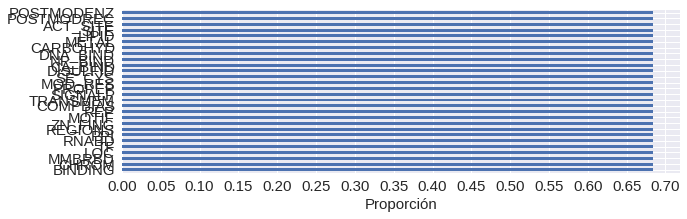

In [74]:
with_type = dataset[cat_vars]
# dataset.columns.drop(cat_vars, 1).tolist()
nulcount = (with_type.isnull().sum(axis=0) / with_type.shape[0]).sort_values(ascending=True)
plt.figure(figsize=(10,3))
# plt.title("Cantidad de variantes con valor nulo")
plt.yticks(size=15)
plt.xticks(np.arange(0, 1, 0.05), size=15)

plt.xlabel("Proporción", size=15)
ax = nulcount.plot(kind="barh")

# plt.savefig("/home/marlan/Desktop/proporcion_nulos_structural.pdf", bbox_inches='tight')

### Single Train Test

### Multiple Train Tests

In [ ]:
for i in range(20):
    train = pd.concat([
        dataset.loc[dataset_disease_index].sample(n=25000, random_state=i),
        dataset.loc[dataset_poly_index].sample(n=25000, random_state=i)
    ]).sample(frac=1)
    
    test = pd.concat([
        dataset.loc[dataset_disease_index.difference(train.index)].sample(n=3855, random_state=i),
        dataset.loc[dataset_poly_index.difference(train.index)].sample(n=14653, random_state=i)
    ]).sample(frac=1)
    train.to_csv("../data/processed/3/train_test_sets/train_{}.csv".format(i), index=True, index_label="MUTANT")
    test.to_csv("../data/processed/3/train_test_sets/test_{}.csv".format(i), index=True, index_label="MUTANT")